# Homework5 by group3 

Authors:Kaiyang LIN,Tianhao MOU,Lin LIU,Yunxia SHI,Guangyi NING

# Introduction

Our group get the data from https://stats.bls.gov/ (United States Department of Labor). 
In order to find the variables which have great effects on the wage, we use the data to generate a linear function. 
It interprets the relationship between the wage and many variables which we can not ignore.  





# Varible Description

From SAS, We find sever significant variables.
 
 
We use the method “stepwise regression” to find the most possible significant variables.
Educ—education years
Urban—working place
Exper—working experience
Married—Marriage status
Iq—intelligence quotient
Tenure—Tenure
Meduc—Mother eduction
Hours—Absent hours
Age—age
Black—race
South—region

In [ ]:
from IPython.display import Image
Image('./sas.png')

In [3]:
import pandas as pd
wage=pd.read_stata('./wage.dta')
wage.head()

,age,black,brthord,educ,exper,feduc,hours,iq,kww,lwage,married,meduc,sibs,south,tenure,urban,wage
0,31,0,2.0,12,11,8.0,40,93,35,6.645091,1,8.0,1,0,2,1,769
1,37,0,NaN,18,11,14.0,50,119,41,6.694562,1,14.0,1,0,16,1,808
2,33,0,2.0,14,11,14.0,40,108,46,6.715384,1,14.0,1,0,9,1,825
3,32,0,3.0,12,13,12.0,40,96,32,6.476973,1,12.0,4,0,7,1,650
4,34,0,6.0,11,14,11.0,40,74,27,6.331502,1,6.0,10,0,5,1,562



The relationships between wage and other listing varibles can be describes as belows


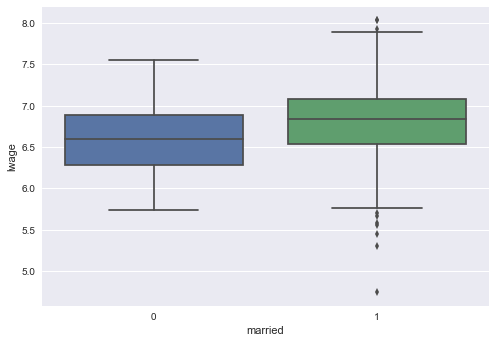

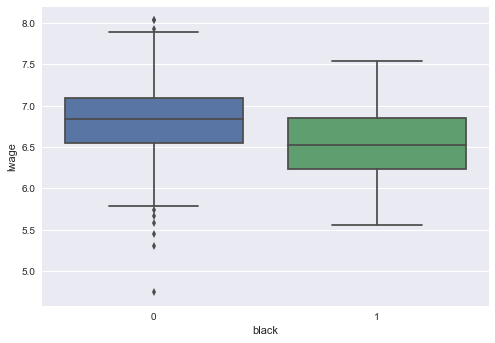

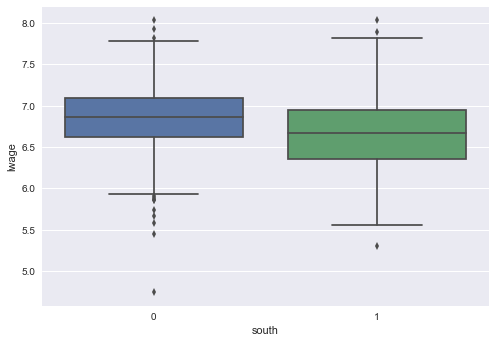

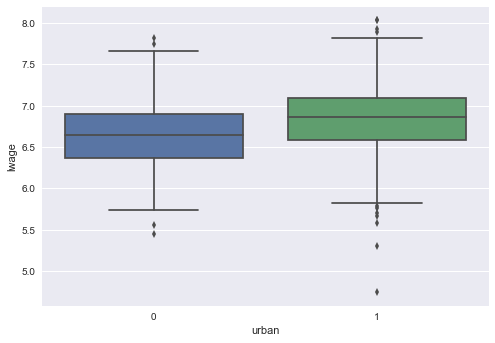

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import the package
sns.set_style("darkgrid")
sns.boxplot(x=wage['married'], y=wage['lwage'])
plt.show()
sns.boxplot(x=wage['black'], y=wage['lwage'])
plt.show()
sns.boxplot(x=wage['south'], y=wage['lwage'])
plt.show()
sns.boxplot(x=wage['urban'], y=wage['lwage'])
plt.show()

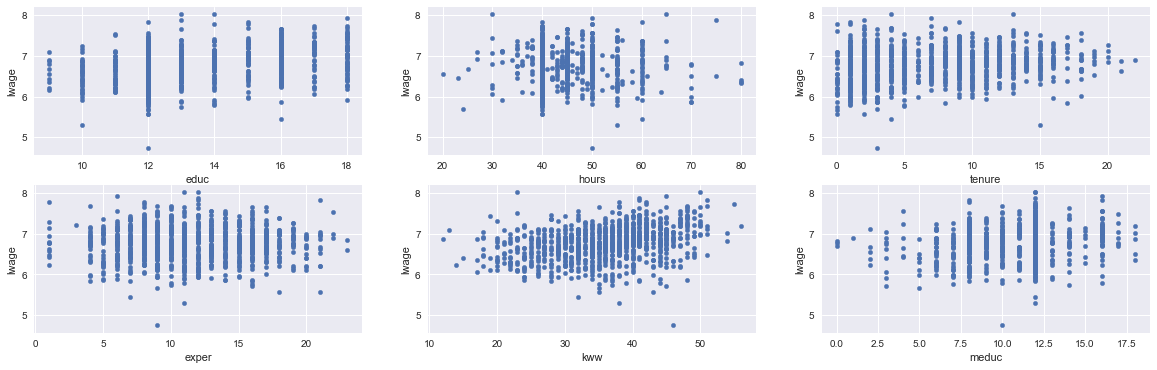

In [7]:
fig,ax=plt.subplots(2,3,figsize=(20, 6))
wage.plot(x='educ',y='lwage',kind='scatter',ax=ax[0,0])
wage.plot(x='hours',y='lwage',kind='scatter',ax=ax[0,1])
wage.plot(x='tenure',y='lwage',kind='scatter',ax=ax[0,2])
wage.plot(x='exper',y='lwage',kind='scatter',ax=ax[1,0])
wage.plot(x='kww',y='lwage',kind='scatter',ax=ax[1,1])
wage.plot(x='meduc',y='lwage',kind='scatter',ax=ax[1,2])
plt.show()

# Model Construction


Our first model can be described by the following function:


$$
log(wage) = \beta_0 + \beta_1 educ + \beta_2 iq + \beta_3 hours + \beta_4 tenure + \beta_5 exper + \beta_6 kww + \beta_7 meduc + \beta_8 age + \beta_9 married + \beta_{10} black + \beta_{11} urban + \beta_{12} south + u \\
$$

In [4]:
#model_1
import statsmodels.api as sm
import statsmodels.tools as tools
import numpy as np
reg1=sm.OLS(endog=wage['lwage'],
           exog=tools.add_constant(wage[['educ','iq','hours','tenure','exper','kww','meduc','age','married','black','urban','south']]),
           missing='drop')
results1=reg1.fit()
print(results1.summary())

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     27.38
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           1.11e-52
Time:                        20:31:07   Log-Likelihood:                -326.50
No. Observations:                 857   AIC:                             679.0
Df Residuals:                     844   BIC:                             740.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1812      0.192     26.932      0.0

# Model improving


(1) Considering the warning that "Standard Errors assume that the covariance matrix of the errors is correctly specified.", we removed the model by removing the  variable 'age’.

(2) Considering the warning that "The condition number is large, 1.96e+03. This might indicate that there are strong multicollinearity or other numerical problems.", we modified our model by removing 'iq'.






**
Our second model can be described by the following function:
**

$$
log(wage) = \beta_0 + \beta_1 educ + \beta_2 hours + \beta_3 tenure + \beta_4 exper + \beta_5 kww + \beta_6 meduc + \beta_8 married + \beta_9 black + \beta_{10} urban + \beta_{11} south + u \\
$$

In [5]:
#model_2
import statsmodels.api as sm
import statsmodels.tools as tools
import numpy as np
reg2=sm.OLS(endog=wage['lwage'],
           exog=tools.add_constant(wage[['educ','hours','tenure','exper','kww','meduc','married','black','urban','south']]),
           missing='drop')
results2=reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     31.52
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           4.99e-52
Time:                        20:31:09   Log-Likelihood:                -331.70
No. Observations:                 857   AIC:                             685.4
Df Residuals:                     846   BIC:                             737.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5125      0.139     39.574      0.0


From the table we can tell that all the variables are significant at the level of the saliency of 5%, which means that all the 10 variables including 'educ', 'hours', 'tenure', 'exper', 'kww', 'meduc', 'married', 'black', 'urban' and 'south' have significant influence on 'wage'.




Thus the model can be described as:




$$
log(wage) = 5.5125 + 0.0560 educ - 0.0059 hours + 0.0082 tenure + 0.0144 exper + 0.0053 kww + 0.0109 meduc + 0.1887 married - 0.1641 black + 0.1760 urban - 0.0796 south + u \\
$$

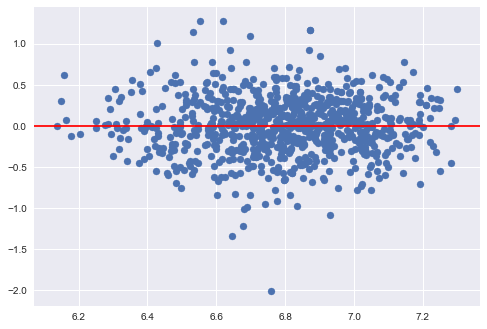

In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(results2.predict(), results2.resid)
plt.axhline(y=0,c='r')
plt.show()



The above plot shows that errors are generally well distributed about 0 and the variance does not change with the dependent variable.


# Conclusion

By ultilizing the data from the United States Department of Labor in 2012, 
we generate a linear function to describe the relationship between the wage and manyx relevant variables.  



To better explain the relationships, we revise and improve the first model based on its regression results, and therefore construct the second model.  



Our model suggests that the normal wage level of Americans in 2012 is positive relevant to education level, the tenure, working experience, knowledge level, and their mothers' educational level.
and negative relevant to absent hours. 
While other varibles being equal, the married workers and the urban workers usually earn higher wages, and the 
blacks normally earn lower.   



As the testing below shows, the whole model is significant since the Prob(F-statistic) < 0.05. 
Besides, all the variables are significant at the level of the saliency of 5%.
The residual satisfies the homogeneity of variance.  



Our model still has some deficiency.  
First, it is just a simple linear regression, while in fact some varibles may have higher order relationship. 
Besides, there are some varibles beyond our consideration, which leave space for future advancement.
